## Vectors
* Magnitute and Direction
* Examples: Force, Velocity
* Basic Operations: 
    - Sum and Substraction: Same Direction, Opposite Direction,
    - Parallelogram Law 
    - Scalar Multiplication
    - Vector Decomposition
    - Norm
    - Distance
* Dot Product
* Angle
* Projection
* Cross Product
* Linear Independence & Orthogonality
* Usages
* Python Applications
### Magnitude and Direction
Vectors always have magnitude (also called norm or length) and direction (often represented by angles)
### Vectors in Python
Vectors in Python are simply numpy arrays. You can create then using np.array():

In [2]:
import numpy as np
a_2d = np.array([2, 2])
b_2d = np.array([3, 3])

**a and b vectors:**

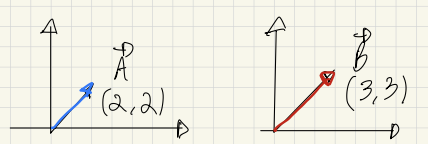


### Addition and Substraction
To sum two vectors that have the same direction, the result will be a vector with the same direction and summed lengths:

In [3]:
c_2d = a_2d + b_2d
print(c_2d)

[5 5]


Representation:

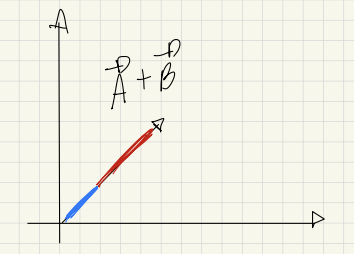

Remember that substraction (a-b) can also be represented by an addition (a+(-b)):

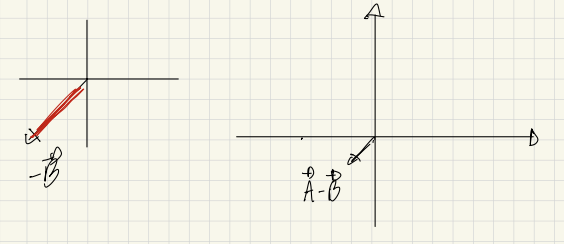

When two vectors have different directions, we can use the parallelogram law (or the triangle law):

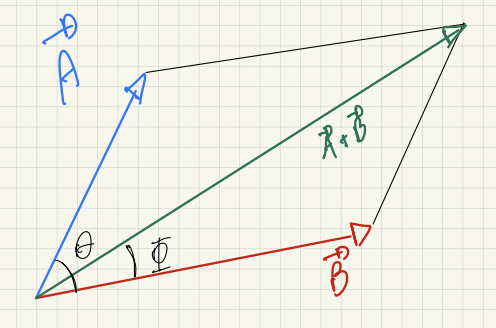

Given the length of each vector and the angle between them, we can calculate the length and angle of the result:

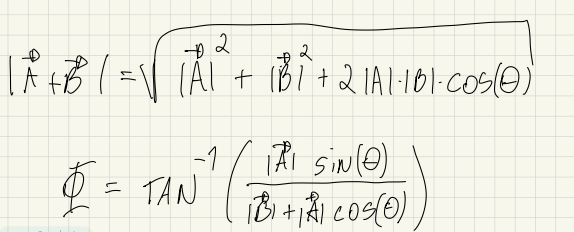

***
### Scalar Multiplication
Multiplying a vector by a scalar give us a vector with the same direction:

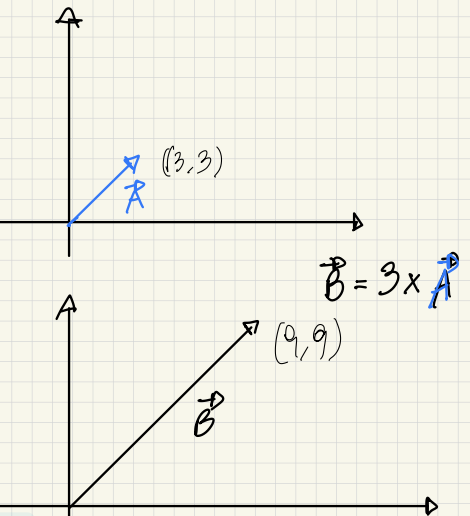


In [4]:
# 'a' should be converted to numpy array
# otherwise, multiplying with a scaler produces different results
a = [3,3]
b = 3* a
print(b)

[3, 3, 3, 3, 3, 3]


In [5]:
import numpy as np
a = np.array([3,3])
b = 3*a
print(b)

[9 9]


### Decomposition of a Vector
We have already been using this notation, but showing a vector as a composite of 1-dimension vectors is useful, because we know how to deal with scalars:

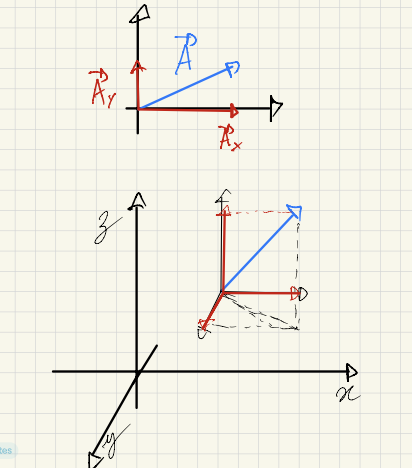


### Norm
Norm is the length of the vector (magnitude). We can calculate it using the decompositions we just mentioned:
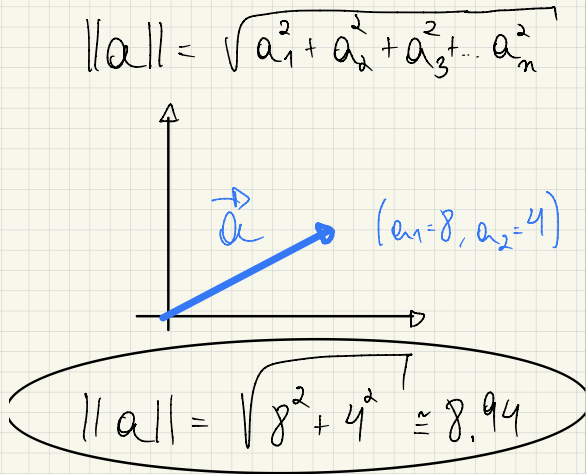

In Python we could calculate it using the np.linalg.norm() function:

In [6]:
import math
import numpy as np
a = np.array([8,4])
length = math.sqrt((8**2)+(4**2))
print(length)

8.94427190999916


In [7]:
x = np.linalg.norm(a)
print(x)

8.94427190999916


### Distance
Distance is a very used calculation in many ML algorithms (such as k-means clusters). We use the following formula to calculate it:

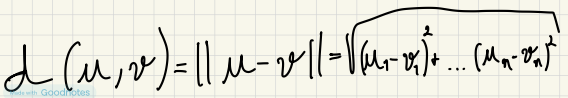

It can also be calculated as `norm(a-b)`.
### Example
Let's work with two 2D vectors (a and b):

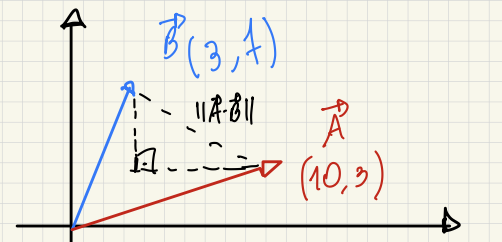

Let's calculate the norm of each vector, the norm of the sum of a and b and finally the distance between a and b. Let's do it first using math module and the formulas we just learned:


In [8]:
a = [10,3]
b = [3,7]
import math
norma = math.sqrt((a[0]**2)+(a[1]**2))
normb = math.sqrt((b[0]**2)+(b[1]**2))
angle_a = math.asin(a[1]/norma)
angle_b = math.asin(b[1]/normb)
teta = angle_b - angle_a
norm_sum = math.sqrt((norma**2)+(normb**2)+2*norma*normb*math.cos(teta))
distance = math.sqrt(((a[0]-b[0])**2)+((a[1]-b[1])**2))
print(f'{norma = }')
print(f'{normb = }')
print(f'{norm_sum = }')
print(f'{distance = }')

norma = 10.44030650891055
normb = 7.615773105863909
norm_sum = 16.401219466856727
distance = 8.06225774829855


It makes more sense to use NumPy norm function:

In [9]:
a = np.array(a)
b = np.array(b)

norma = np.linalg.norm(a)
normb = np.linalg.norm(b)
norm_sum = np.linalg.norm(a+b)
distance = np.linalg.norm(a-b) #distance
print(f'{norma = }')
print(f'{normb = }')
print(f'{norm_sum = }')
print(f'{distance = }')        

norma = 10.44030650891055
normb = 7.615773105863909
norm_sum = 16.401219466856727
distance = 8.06225774829855


### Dot Product
Dot product, or scalar product, represents how close the vectors align. If 0, the vectors are orthogonal, if positive, they are aligned to "similar" directions. It can be calculated using the scalar coordinates of the vectors:

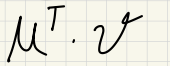

Or the magnitudes and angle:

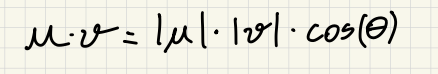

Two 2D vectors examples with angle<90:

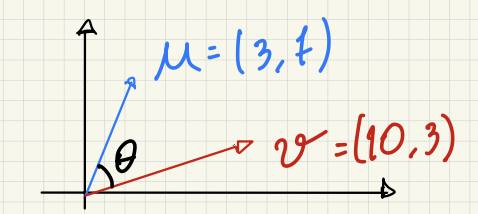


In [10]:
u = np.array([3,7])
v = np.array([10,3])
teta = math.acos((u[0]*v[0]+u[1]*v[1])/(math.sqrt(u[0]**2+u[1]**2)*math.sqrt(v[0]**2+v[1]**2))) # We will see this formula soon.
dot_uv = math.sqrt(u[0]**2+u[1]**2)*math.sqrt(v[0]**2+v[1]**2)*math.cos(teta)
print(dot_uv)
dot_uv_alt = u[0]*v[0]+u[1]*v[1]
print(dot_uv_alt)
print(np.dot(u,v))

51.00000000000001
51
51


Two 2D vectors examples with angle=180:

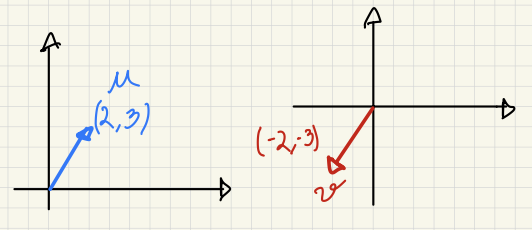

In [11]:
u = np.array([-2,-3])
v = np.array([2,3])
teta = math.pi
dot_uv = math.sqrt(u[0]**2+u[1]**2)*math.sqrt(v[0]**2+v[1]**2)*math.cos(teta)
print(dot_uv)
dot_uv_alt = u[0]*v[0]+u[1]*v[1]
print(dot_uv_alt)
print(np.dot(u,v))

-12.999999999999998
-13
-13


Two 2D vectors examples with angle=90:

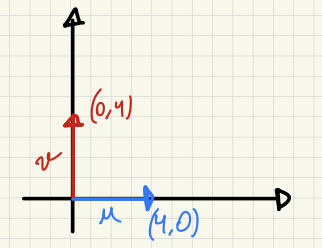

In [12]:
u = np.array([4,0])
v = np.array([0,4])
teta = math.pi/2
dot_uv = math.sqrt(u[0]**2+u[1]**2)*math.sqrt(v[0]**2+v[1]**2)*math.cos(teta)
print(dot_uv)
dot_uv_alt = u[0]*v[0]+u[1]*v[1]
print(dot_uv_alt)
print(np.dot(u,v))

9.797174393178826e-16
0
0


Quick reminder of how cos(x) behave:

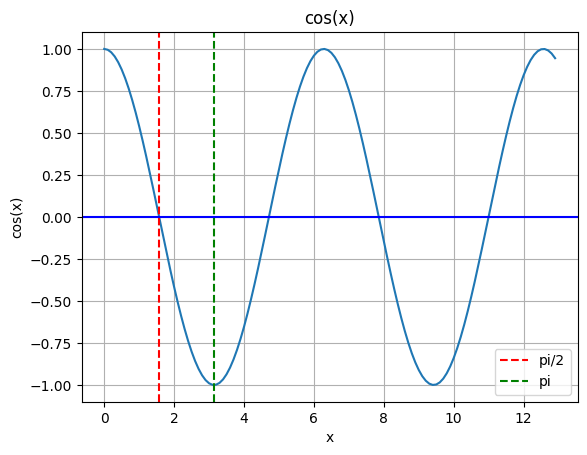

In [13]:
x = [i/10 for i in range(0,130)]
y = [math.cos(j) for j in x]
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('cos(x)')
plt.grid(True)
plt.axvline(x=math.pi/2, color='r', linestyle='--', label='pi/2')
plt.axvline(x=math.pi, color='g', linestyle='--', label='pi')
plt.axhline(y=0, color='b', linestyle='-')
plt.legend()
plt.show()

### Angle
To calculate angle of two vectors, we use simple geometry:

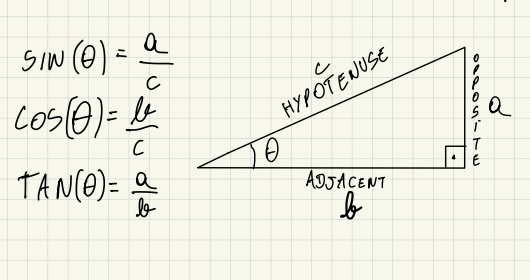

The easiest way to calculate angle is to use arc cos of dot(u,v)/norm(u)*norm(v):

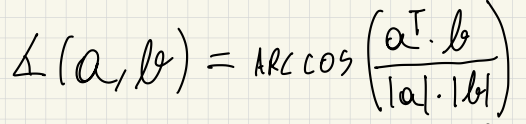

In [14]:
a = np.array([10,3,2,3])
b = np.array([3,7,4,5])
import math
import numpy as np
angle = math.acos((np.dot(a,b))/(np.linalg.norm(a)*np.linalg.norm(b)))
print(f'{angle = } rads')
print(f'{math.cos(angle) = }')

angle = 0.8320796291729496 rads
math.cos(angle) = 0.673339678200224


### Projection
Projection is the shadow of a vector in another vector:

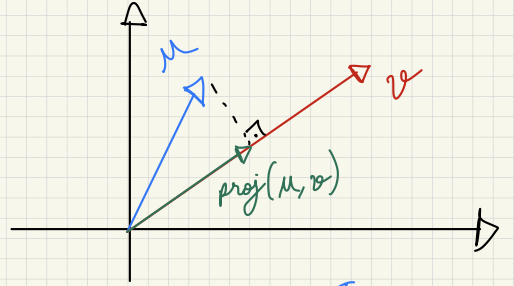

To calculate the magnitude of the projection we can use the dot product divided by the norm of the second vector:

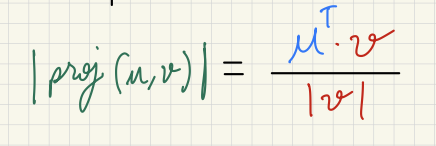

Then, to figure out the vector itself, we just need to do a scalar multiplication on the second vector. We will multiply the vector by the ratio of norm(projection)/norm(second vector):

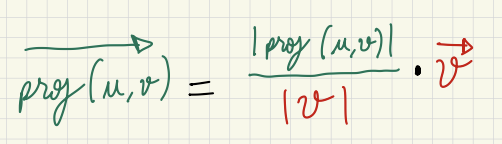




### Example

In [15]:
a = np.array([1,-2,3])
b = np.array([2,4,5])
norm_b = np.linalg.norm(b)
dot_ab = np.dot(a,b)
norm_proj = dot_ab/norm_b
print(norm_proj/norm_b)
proj = (norm_proj/norm_b)*b
print(proj)

0.19999999999999998
[0.4 0.8 1. ]


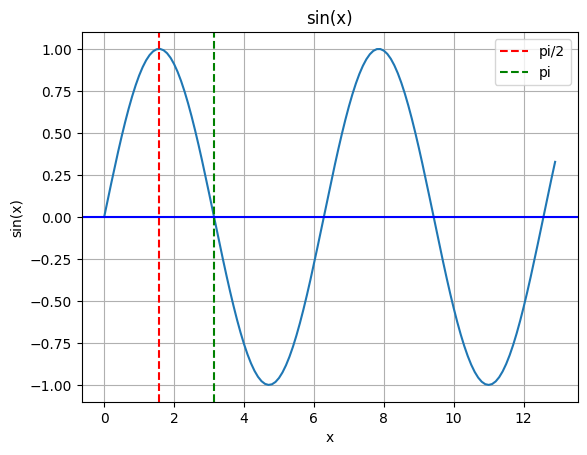

In [16]:
x = [i/10 for i in range(0,130)]
y = [math.sin(j) for j in x]
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('sin(x)')
plt.grid(True)
plt.axvline(x=math.pi/2, color='r', linestyle='--', label='pi/2')
plt.axvline(x=math.pi, color='g', linestyle='--', label='pi')
plt.axhline(y=0, color='b', linestyle='-')
plt.legend()
plt.show()

### Cross Product
A cross product of u x v is a vector whose direction will be perpendicular to the plan of u and v. The magnitude of the vector is given by:

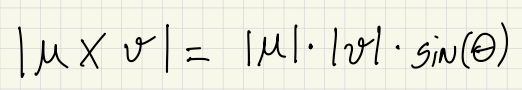

The direction of it will also be perpendicular to the plane of u and v:

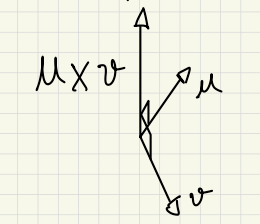

We can also use matrix notation to calculate the cross product of two vectors:

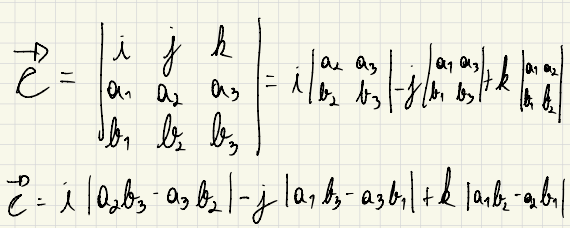

### Example:

In [17]:
# Using only math module
u = [1,2,5]
v = [2,-4,5]
norm_u = math.sqrt(u[0]**2+u[1]**2+u[2]**2)
norm_v = math.sqrt(v[0]**2+v[1]**2+v[2]**2)
w = [u[1]*v[2]-u[2]*v[1],-u[0]*v[2]+u[2]*v[0],u[0]*v[1]-u[1]*v[0]]
print(f'u x v coordinates are: {w}')
norm_w = math.sqrt(w[0]**2+w[1]**2+w[2]**2)
print(f'|u x v| = {norm_w}')
dot_wu = w[0]*u[0]+w[1]*u[1]+w[2]*u[2]
dot_wv = w[0]*v[0]+w[1]*v[1]+w[2]*v[2]
angle_wu = math.acos(dot_wu/(norm_w*norm_u))
angle_wv = math.acos(dot_wv/(norm_w*norm_v))
print(f'The angle between w and u is {math.degrees(angle_wu)} degrees')
print(f'The angle between w and v is {math.degrees(angle_wv)} degrees')


u x v coordinates are: [30, 5, -8]
|u x v| = 31.448370387032774
The angle between w and u is 90.0 degrees
The angle between w and v is 90.0 degrees


In [18]:
# Using NumPy 
u = np.array([1,2,5])
v = np.array([2,-4,5])
w = np.cross(u,v)
print(f'u x v coordinates are: {w}')
norm_w = np.linalg.norm(w)
print(f'|u x v| = {norm_w}')

u x v coordinates are: [30  5 -8]
|u x v| = 31.448370387032774
